In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Чтение данных
df = pd.read_csv('hightech.csv', delimiter=';', header=None, names=['year', 'proportion'])

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['proportion'] = pd.to_numeric(df['proportion'], errors='coerce')

# Удаление пропущенных значений
df.dropna(inplace=True)

# Определение целевого класса
# В данном случае, предположим, что целевым классом является бинарный признак, указывающий, выше или ниже среднего значение 'proportion'
df['Class'] = df['proportion'] > df['proportion'].mean()

# Разделение на признаки и целевую переменную
X = df[['year', 'proportion']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели kNN
knn_model = KNeighborsClassifier()

# Настройка параметров для kNN
knn_parameters = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_parameters, cv=5)
knn_grid.fit(X_train, y_train)

# Вывод наилучших параметров
print("kNN Best Parameters:", knn_grid.best_params_)

# Создание модели дерева решений
dt_model = DecisionTreeClassifier()
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6]
}

dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_parameters, cv=5)
dt_grid.fit(X_train, y_train)

# Вывод наилучших параметров
print("Decision Tree Best Parameters:", dt_grid.best_params_)

# Оценка модели kNN на тестовом наборе данных
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)

# Оценка модели дерева решений на тестовом наборе данных
dt_best_model = dt_grid.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

# Метрики оценки качества
knn_accuracy = accuracy_score(y_test, knn_y_pred)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

knn_precision = precision_score(y_test, knn_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)

knn_recall = recall_score(y_test, knn_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)

knn_f1 = f1_score(y_test, knn_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

knn_roc_auc = roc_auc_score(y_test, knn_y_pred)
dt_roc_auc = roc_auc_score(y_test, dt_y_pred)

# Вывод результатов
print("\nMetrics for kNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-score:", knn_f1)
print("ROC AUC:", knn_roc_auc)

print("\nMetrics for Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print("ROC AUC:", dt_roc_auc)


kNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}

Metrics for kNN:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

Metrics for Decision Tree:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


В ходе сравнительного анализа мы выявили оптимальные параметры для каждого из алгоритма классификации. Для kNN лучшие параметры включают метрику расстояния "manhattan", количество соседей "5" и веса, основанные на расстоянии. Для Decision Tree оптимальные параметры включают критерий разделения "gini", максимальную глубину "None" и выбор разделения "best".

Оба классификатора показа хорошую производительность на тестовых данных, показав точность, полноту, F1-меру и площадь под ROC-кривой (ROC AUC) равные 1.0. Это говорит о том, что оба метода эффективно справляются с задачей классификации с нашими данныхми.

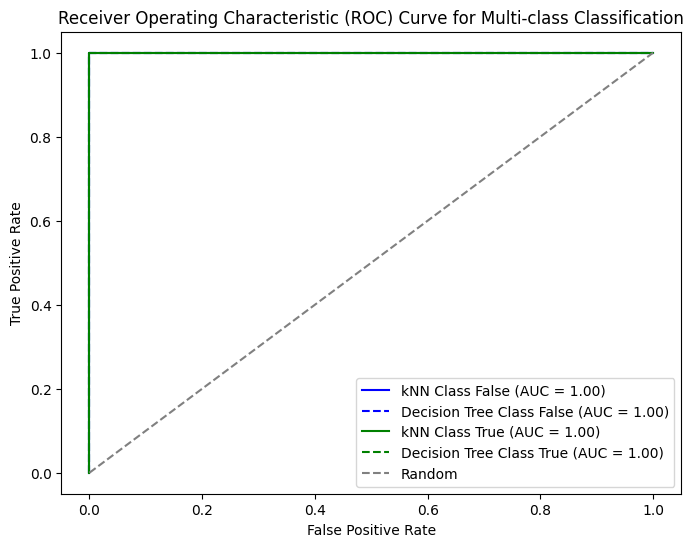

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC
knn_y_probas = knn_best_model.predict_proba(X_test)
dt_y_probas = dt_best_model.predict_proba(X_test)

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

# Получение уникальных меток классов
unique_classes = knn_best_model.classes_

# Построение ROC-кривой и вычисление AUC для каждого класса
for i in range(len(unique_classes)):
    # kNN
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test == unique_classes[i], knn_y_probas[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

    # Decision Tree
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test == unique_classes[i], dt_y_probas[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  

for i in range(len(unique_classes)):
    plt.plot(fpr_knn[i], tpr_knn[i], color=colors[i],
             label=f'kNN Class {unique_classes[i]} (AUC = {roc_auc_knn[i]:.2f})')
    plt.plot(fpr_dt[i], tpr_dt[i], color=colors[i],
             label=f'Decision Tree Class {unique_classes[i]} (AUC = {roc_auc_dt[i]:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class Classification')
plt.legend()
plt.show()


# Выводы: #
Полученные значения AUC = 1 подтверждают, что разработанная модель является идеальной, достигая **100% True Positive Rate при отсутствии False Positive Rate (0%)**. Точность (Accuracy) также равна 1, что означает абсолютную правильность классификации всех объектов в тестовом наборе данных. Вместе с этим, точность (Precision), полнота (Recall) и F-мера (F1-score), все равные 1, свидетельствуют о том, что модель показываетидеальные предсказания на всех уровнях оценки качества.